# Week 8 - 27th September, 2023

1. Build a logistic regression model to predict the probability of getting `chd` (Coronary Heart Disease), that is, `P(chd = 1)`. Use all other columns except chd as features to build the model.
2. Find out which features are statistically significant in the logistic regression model built in Question 1. Build a new logistic regression model using only the significant features.
3. From the logistic regression model parameters, determine which parameters affect the probability of `chd` positively and negatively.
4. Calculate Youden’s index for all possible cut-off probabilities ranging from `0.1` to `0.5` with an interval of `0.01`. Find the optimal cut-off where Youden’s index is maximum.
5. Build a confusion matrix based on the cut-off probability found in Question 4 and report the precision and recall of the model for chd cases (i.e., `chd` = 1).
6. Find optimal cut-off probability using cost-based approach using the cost of FPs and FNs as defined below:
   - Cost of predicting “chd” as “No chd” (FNs) cases is 5 times more than predicting “No chd” as “chd” (FPs).
   - Then find the precision and recall of the model for `chd` = 1.

In [11]:
import pandas as pd

input_df = pd.read_csv('../classification-datasets/HeartEW.csv')

# Modifying the class column so that the values fall in the range of 0-1
input_df.Class = input_df.Class.apply(lambda x: x - 1)

input_df.head(5)

,Class,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,34,1,1,118,182,0,2,174,0,0.0,1,0,3
1,1,53,1,4,140,203,1,2,155,1,3.1,3,0,7
2,1,61,1,1,134,234,0,0,145,0,2.6,2,2,3
3,0,68,1,3,118,277,0,0,151,0,1.0,1,1,7
4,1,54,1,4,122,286,0,2,116,1,3.2,2,2,3


In [12]:
X_features = input_df.drop(['Class'], axis=1).columns
filtered_df = input_df[X_features]

In [33]:
import statsmodels.api as sm

X = sm.add_constant(filtered_df)
Y = input_df.Class

In [15]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [19]:
logit = sm.Logit(train_Y, train_X)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.323056
         Iterations 7


In [20]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Class            Pseudo R-squared: 0.531     
Date:               2023-09-27 11:42 AIC:              150.1150  
No. Observations:   189              BIC:              195.4995  
Df Model:           13               Log-Likelihood:   -61.058   
Df Residuals:       175              LL-Null:          -130.05   
Converged:          1.0000           LLR p-value:      5.3379e-23
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -6.6918     3.6226   -1.8473   0.0647   -13.7920   0.4083
F1        -0.0084     0.0332   -0.2535   0.7999    -0.0735   0.0567
F2         1.7630     0.6855    2.5717   0.0101     0.4194   3.1066
F3         0.7348     0.2778    2.6453   0.0082     0.1904   1.2793
F4         0.0127     0.0146    0.8690   0.3848    -0.0159   0.0412
F5         0.0051     0.0047    1.1031   0.2700    -0.0040   0.0143
F6        -1.2262     0.7166   -1.7111   0.0871    -2.6308   0.1783
F7         0.3657     0.2421    1.5105   0.1309    -0.1088   0.8403
F8        -0.0219     0.0126   -1.7399   0.0819    -0.0466   0.0028
F9         0.7629     0.5516    1.3831   0.1666    -0.3182   1.8439
F10        0.3794     0.2944    1.2885   0.1976    -0.1977   0.9565
F11        0.4701     0.4649    1.0112   0.3119    -0.4411   1.3813
F12        1.1859     0.3259    3.6385   0.0003     0.5471   1.8247
F13        0.3194     0.1315    2.4299   0.0151     0.0618   0.5770
=================================================================

"""

In [22]:
def get_significant_vars(lm):
    #Store the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    # Filter the column names where p-value is less than 0.05
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

significant_vars = get_significant_vars( logit_model )
significant_vars

['F2', 'F3', 'F12', 'F13']

In [26]:
final_logit = sm.Logit( train_Y,

sm.add_constant( train_X [significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.396402
         Iterations 7


In [27]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Class            Pseudo R-squared: 0.424     
Date:               2023-09-27 12:08 AIC:              159.8401  
No. Observations:   189              BIC:              176.0489  
Df Model:           4                Log-Likelihood:   -74.920   
Df Residuals:       184              LL-Null:          -130.05   
Converged:          1.0000           LLR p-value:      6.4173e-23
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -6.7264     1.0207   -6.5899   0.0000   -8.7270   -4.7258
F2         1.1994     0.5246    2.2865   0.0222    0.1713    2.2276
F3         0.9104     0.2516    3.6188   0.0003    0.4173    1.4035
F12        1.1579     0.2593    4.4651   0.0000    0.6496    1.6661
F13        0.4142     0.1124    3.6834   0.0002    0.1938    0.6345
=================================================================

"""

In [31]:
y_pred_df= pd.DataFrame( {'actual': test_Y, 'predicted_prob': final_logit.predict(sm.add_constant( test_X[significant_vars]))})
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
113,0,0.075499
30,1,0.515484
46,0,0.078449
68,0,0.025013
104,0,0.152206
109,0,0.059941
183,1,0.988878
18,0,0.344634
196,1,0.733790
227,0,0.616245


In [35]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
113,0,0.075499,0
30,1,0.515484,1
46,0,0.078449,0
68,0,0.025013,0
104,0,0.152206,0
109,0,0.059941,0
183,1,0.988878,1
18,0,0.344634,0
196,1,0.733790,1
227,0,0.616245,1


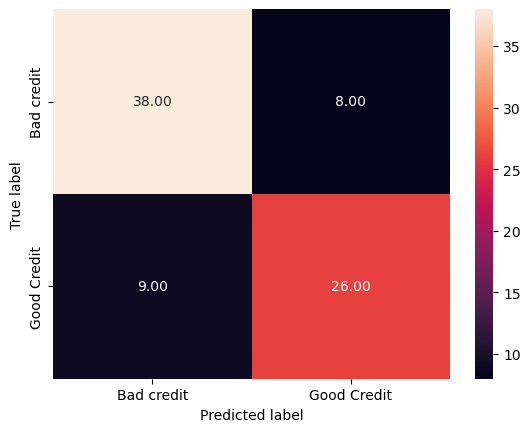

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn import metrics
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ['Bad credit', 'Good Credit'], yticklabels = ['Bad credit', 'Good Credit'] )

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [39]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        46
           1       0.76      0.74      0.75        35

    accuracy                           0.79        81
   macro avg       0.79      0.78      0.79        81
weighted avg       0.79      0.79      0.79        81



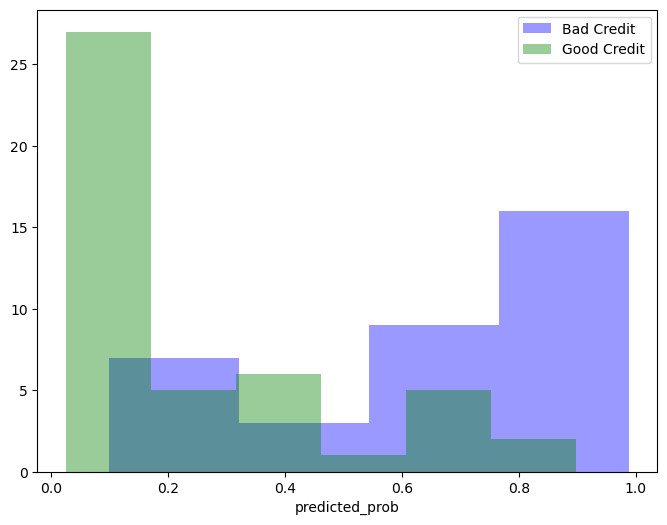

In [69]:
import warnings
warnings.filterwarnings("ignore")

plt.figure( figsize = (8,6) )

# Plotting distribution of predicted probability values for bad credits
sn.distplot( y_pred_df[y_pred_df.actual == 1]['predicted_prob'], kde=False, color = 'b', label = 'Bad Credit')

# Plotting distribution of predicted probability values for good credits
sn.distplot( y_pred_df[y_pred_df.actual == 0]['predicted_prob'], kde=False, color = 'g', label = 'Good Credit')

plt.legend()
plt.show()

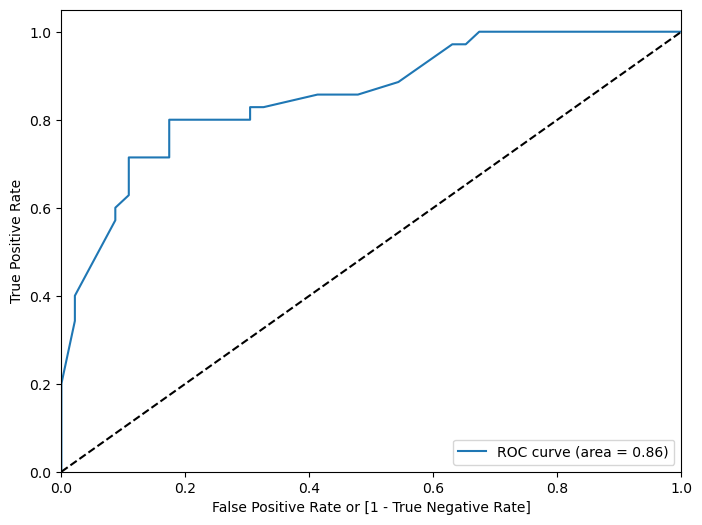

In [45]:
def draw_roc( actual, probs ):
    # Obtain fpr, tpr, thresholds
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )

    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    # Plot the fpr and tpr values for different threshold values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    # draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # Setting x and y labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

In [46]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )

round( float( auc_score ), 2 )

0.86

In [47]:
tpr_fpr = pd.DataFrame({
    'tpr': tpr,
    'fpr': fpr,
    'thresholds': thresholds
})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
15,0.800000,0.173913,0.453761,0.626087
11,0.714286,0.108696,0.626019,0.605590
14,0.742857,0.173913,0.515484,0.568944
12,0.714286,0.152174,0.616245,0.562112
13,0.714286,0.173913,0.525850,0.540373


In [48]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)

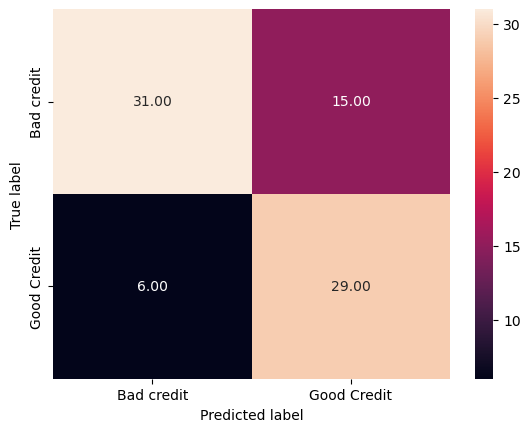

In [49]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new)

In [50]:
print(metrics.classification_report( y_pred_df.actual, y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75        46
           1       0.66      0.83      0.73        35

    accuracy                           0.74        81
   macro avg       0.75      0.75      0.74        81
weighted avg       0.76      0.74      0.74        81



In [56]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    # Get the confusion matrix and calculate cost
    cm = metrics.confusion_matrix( actual, predicted )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [58]:
import numpy as np

idx = 0

## Iterate cut-off probability values between 0.1 and 0.5
for each_prob in range(10, 50):
    cost = get_total_cost( y_pred_df.actual, y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
30,0.40,47.0
25,0.35,47.0
27,0.37,47.0
26,0.36,47.0
31,0.41,47.0


In [60]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.14 else 0)

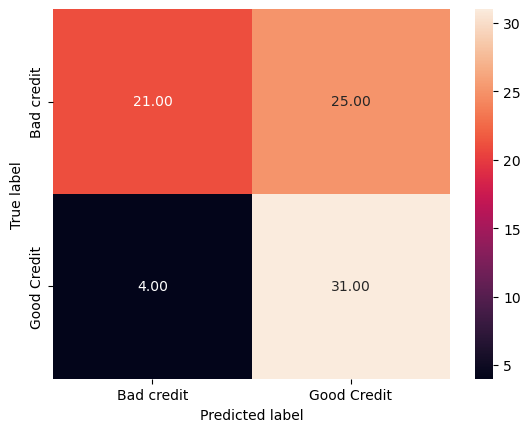

In [61]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_using_cost )